In [1]:
# Preparing the data
import keras
from keras.datasets import mnist

# Building the network
from keras.layers import Dense # Dense Layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

# matplotlib
import matplotlib.pyplot as plt

2023-05-13 17:37:00.133545: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-13 17:37:00.217176: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-13 17:37:01.290854: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print('Training Data shape:', X_train.shape)
print('Testing Data shape:', X_test.shape)

Training Data shape: (60000, 28, 28)
Testing Data shape: (10000, 28, 28)


In [4]:
# Flatten the images(input images)
image_vector_size = 28*28
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

In [5]:
# Hot Encode the output images
# Using one hot encoding to differentiate between the various classes in the dataset.
# In our dataset the value "0" isn't smaller than "9", these are just two different values from our set of possible
# classifications.
num_classes = 10
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('First 5 training labels:', Y_train[:5])

First 5 training labels: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [6]:
# Loss function: Cross entropy
# Optimization Algo: Stochastic Gradient Descent(SGD)
# Building the network
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units = 32, activation = 'sigmoid', input_shape = (image_vector_size,)))  # this is our hidden layer with 32 nodes and sigmoid function as activation function
model.add(Dense(units=num_classes, activation='softmax'))  # This is our output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Input layer and output layer here are going to be:
# input layer = image_vector_size = 784
# output layer = ten labels corresponding to ten nodes in this layer = 10
# Output layer uses special activation function called softmax.
# This normalises the values form the ten output nodes such that:
#     all the values are between 0 and 1, and
#     the sum of all ten values is 1
# This allow us to treat those 10 output values as probabilities and the heighest one is selected
# as the prediction for the one hot vector

# From the input layer to hidden layer there are 784*32 = 25088 weights
# The hidden layer has 32 nodes so tere are 32 biases.
# This brings us to 25088+32 = 25120 parameters.
# From Hidden layer to output layer there are 32*10 weights
# Each 10 nodes add a single bias so 10 biases.
# Totalling up to 25120 + 320 + 10 = 25,450 total params.

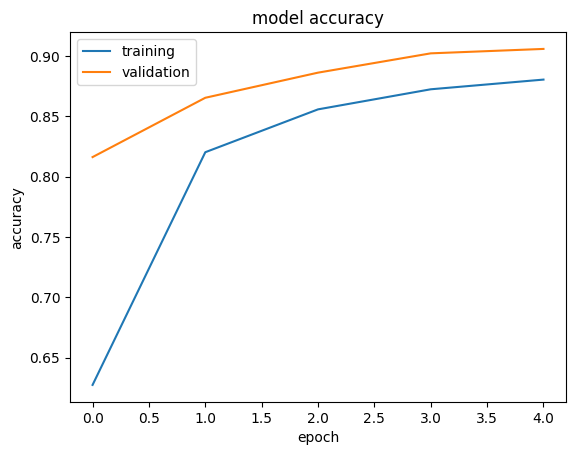

Test loss: 0.478
Test accuracy: 0.892


In [8]:
# Again using keras to train and evaluate this model
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size= 128, epochs=5, verbose=False, validation_split = .1)
(loss, accuracy) = model.evaluate(X_test, Y_test, verbose = False)

# Plotting
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

## Increasing Network depth

In [9]:
# We've created couple of short functions to help reduce boiler plate code
def create_dense(layer_sizes):
    model = Sequential()
# This line is the first hidden layer
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_vector_size,)))

    for s in layer_sizes[1:]:
# This line adds more of the hidden layers to the model
        model.add(Dense(units = s, activation = 'sigmoid'))
# This is the output layer for the model
    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(X_test, Y_test, verbose=False)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


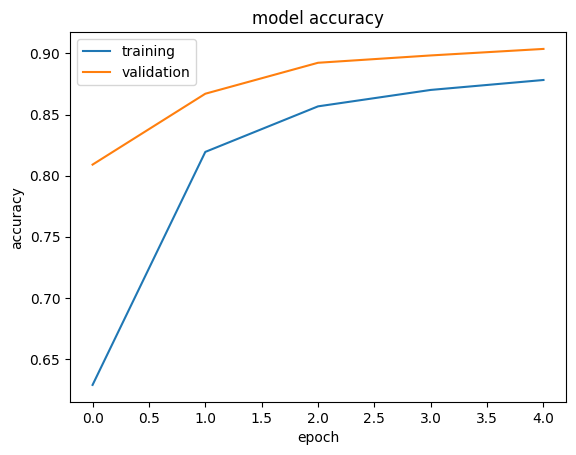


Test loss: 0.488
Test accuracy: 0.889
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


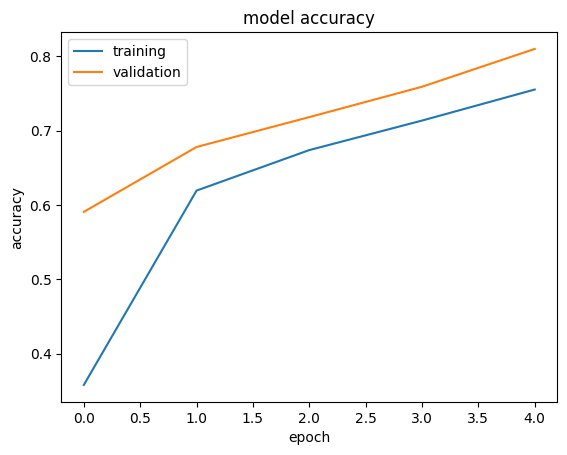


Test loss: 1.15
Test accuracy: 0.786
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                25120     
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


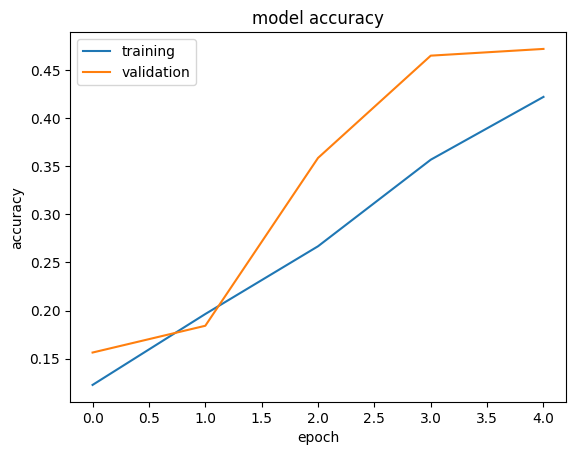


Test loss: 2.1
Test accuracy: 0.463
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                25120     
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


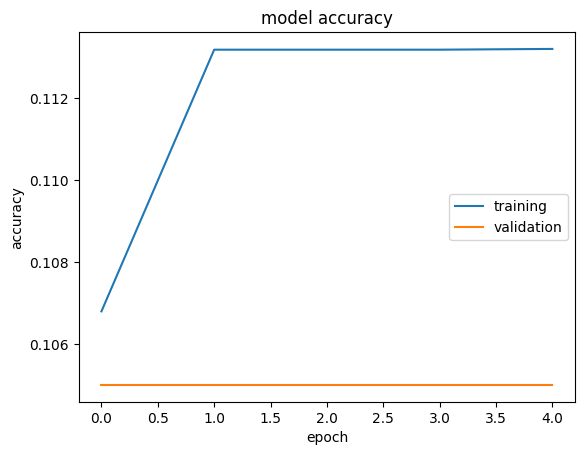


Test loss: 2.29
Test accuracy: 0.113


In [10]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)